<a href="https://colab.research.google.com/github/topkoka/transform_101/blob/master/AI101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K - mean

In [ ]:
import numpy as np

def distance(a,b):
  distance = ((a - b)**2)**0.5
  return distance


x = [ 10 , 15 , 50 , 8, 7, 8,9,15,5,20,7,9,23,17,8,42]
k = 2

g1= 20
g2 = 25



while True:
  l1 = []
  l2 = []

  for i in range(len(x)):
    d = x[i]
    dis1 = distance(d,g1)
    dis2 = distance(d,g2)

    if dis1 < dis2 :
      l1.append(d)
    else:
      l2.append(d)

  m1 = np.mean(l1)
  m2 = np.mean(l2)
  if (g1 == m1 and g2 == m2):
    break;
  g1 = m1
  g2 = m2


  print("x",x)
  print("k",k)
  print("l1",l1)
  print("l2",l2)
  print("m1",m1)
  print("m2",m2)
  print("#########################")


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import random

def distance(a,b):
    distance = ((a - b)**2)**0.5
    return distance

def KMean(k=2,x=None):

    gg = []
    for i in range(k):
        gg.append(random.randint(np.min(x),np.max(x))+i)

    while True:
        l = [[]]
        dis = []
        
        for i in range(len(x)):
          diss = []
          for ii in range(k):
            diss.append(distance(x[i],gg[ii]))
            dis.append(diss)
            idsx = np.argmin(dis[i])
            print(dis[i])
            print(idsx)
        break



x = [ 10 , 15 , 50 , 8, 7, 8,9,15,5,20,7,9,23,17,8,42]
KMean(3,x)


(500, 2)


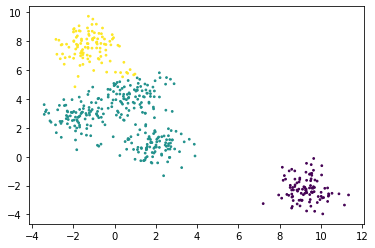

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans


X, y = make_blobs(n_samples= 500 , centers= 5 , cluster_std=0.8 , random_state=0)

kmean = KMeans(n_clusters=3)
kmean.fit(X)
print(X.shape)
plt.scatter(X[:,0],X[:,1],c=kmean.labels_.astype(float),s=3)


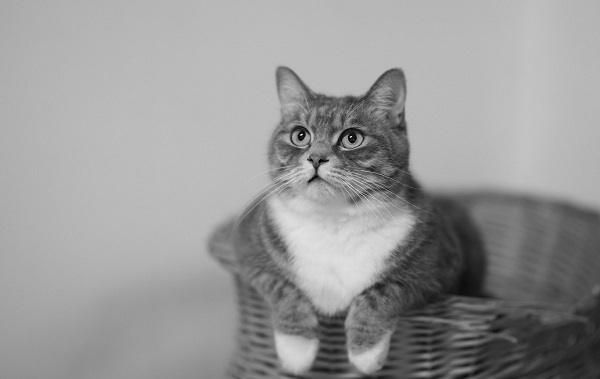

(227400, 1)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import  cv2_imshow
img = cv2.imread("/content/drive/My Drive/training/image.jpeg" , 0);

cv2_imshow(img)
# print(img.shape)
# print(img)

h , w = img.shape;

img_scalar  = np.reshape(img,(w*h,1))

print(img_scalar.shape)


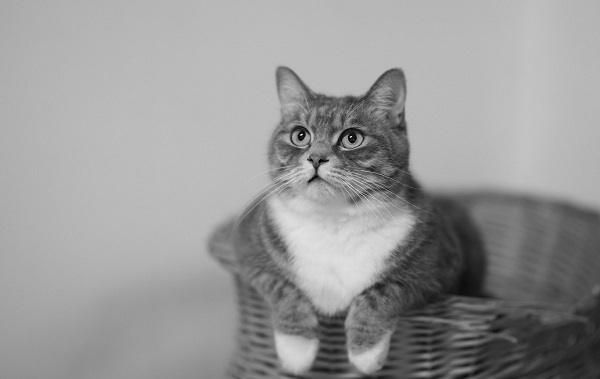

(227400, 1)
(227400,)


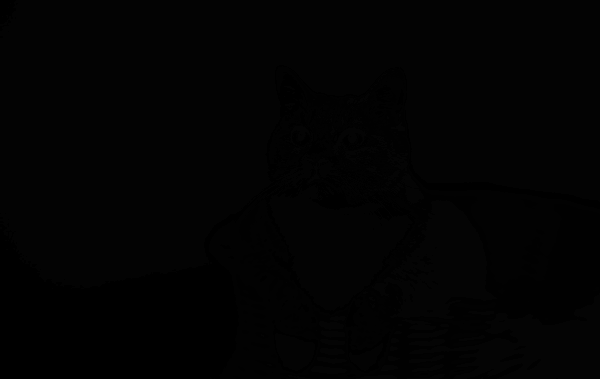

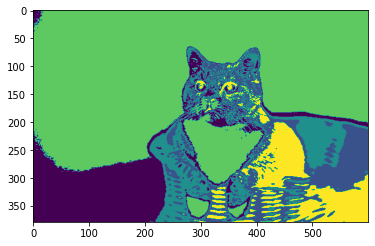

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

from google.colab.patches import  cv2_imshow
img = cv2.imread("/content/drive/My Drive/training/image.jpeg" , 0);

cv2_imshow(img)
# print(img.shape)
# print(img)

h , w = img.shape;

img_scalar  = np.reshape(img,(w*h,1))

print(img_scalar.shape)
kmean = KMeans(n_clusters=5, init='k-means++', max_iter=400,n_init=10,random_state=0)
kmean.fit(img_scalar)

print(kmean.labels_.shape)
out_put = kmean.labels_;
img_output = np.reshape(out_put,(h,w) )
cv2_imshow(img_output)

plt.imshow(img_output)
plt.show()


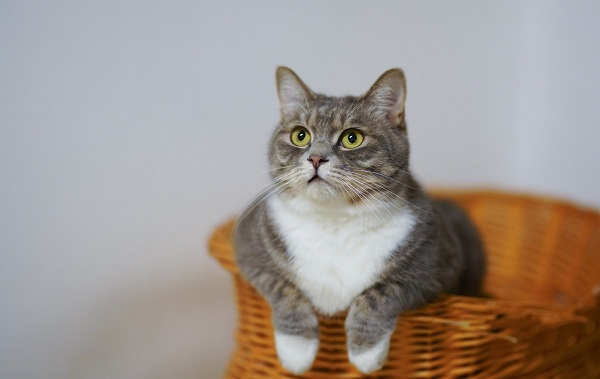

(227400, 1)
(227400, 1)
(227400,)


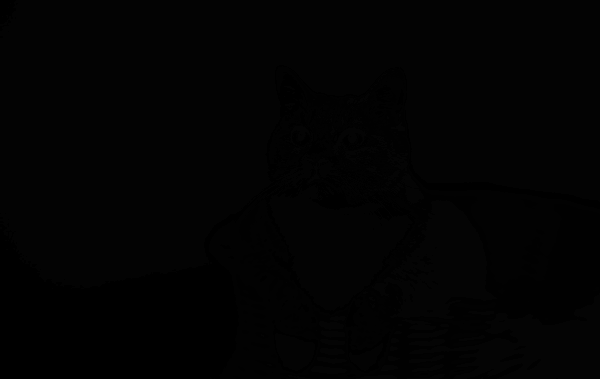

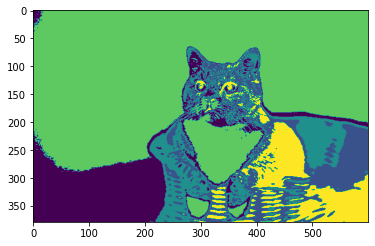

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

from google.colab.patches import  cv2_imshow
img = cv2.imread("/content/drive/My Drive/training/image.jpeg" ,1);

cv2_imshow(img)
# print(img.shape)
# print(img)

h , w , p = img.shape;

img_vector  = np.reshape(img,(w*h,3))
print(img_scalar.shape)

print(img_scalar.shape)
kmean = KMeans(n_clusters=5, init='k-means++', max_iter=400,n_init=10,random_state=0)
kmean.fit(img_scalar)

print(kmean.labels_.shape)
out_put = kmean.labels_;
img_output = np.reshape(out_put,(h,w) )
cv2_imshow(img_output)

plt.imshow(img_output)
plt.show()


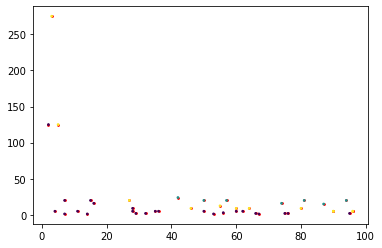

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

dataf1 = pd.read_excel('/content/drive/My Drive/training/SampleData.xlsx',sheet_name = 'SalesOrders')

data = dataf1[['Units','Unit Cost','Total']].to_numpy()
plt.scatter(data[:,0],data[:,1],c='red',s=3)

kmean = KMeans(n_clusters=3)
kmean.fit(data)
plt.scatter(data[:,0],data[:,1],c=kmean.labels_.astype(float),s=3)


# NN


In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

 # load data
dataset = loadtxt('/content/drive/My Drive/training/data.csv', delimiter = ',')
r,c = dataset.shape

# train
X = dataset[0:700 ,0:8]
y = dataset[0:700 ,8:9]
print(X.shape)

# test
X_hat = dataset[700:r, 0: 8]
y_hat = dataset[700:r, 8: 9]
print(X_hat.shape)

# create neural networks

model = Sequential() # create object

model.add(Dense(8,input_dim = 8, activation='relu'))

model.add(Dense(16 , activation='relu'))
model.add(Dense(32 , activation='relu'))
model.add(Dense(32 , activation='relu'))



model.add(Dense(1,activation='sigmoid'))

# ปรับน้ำหนัก
model.compile(loss='binary_crossentropy', optimizer = 'adam' , metrics=["accuracy"])

# train
model.fit(X , y , epochs=200, batch_size=10)
_ , acc = model.evaluate(X,y)
print('accuracy = %.2f %%' %  (acc*100))
print(model.history)


In [ ]:
import numpy as np
# test
output = model.predict(X_hat)
output_i = [];
final = np.round(output)
data_ok = np.abs(final - y_hat)
acc = len(y_hat) - sum(data_ok)
p_acc = acc / len(y_hat)  *100
print("acc %.2f %%" % p_acc)

acc 77.94 %


In [ ]:
import numpy as np
# test
output = model.predict(X_hat)
output_i = [];
final = np.round(output)
loss = np.sum(np.abs(final - y_hat))
correct = y_hat.shape[0] - loss
p_acc = acc / y_hat.shape[0]  *100
print("acc %.2f %%" % p_acc)

acc 77.94 %


In [ ]:
from keras.datasets import mnist

(x_train , y_train) , (x_test,y_test) = mnist.load_data()
print(x_train,y_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] [5 0 4 ... 5 6 8]


In [ ]:
from numpy import mean
from numpy import std
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.datasets import mnist
from keras.utils import to_categorical, plot_model
from matplotlib import pyplot as plt

def get_model(n_dim,output_dim):
  model = Sequential()
  model.add(Dense(32 , input_dim = n_dim, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(output_dim,activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer = 'adam' , metrics=["accuracy"])
  return model

def get_train(X,Y):
  result = []
  input_dim = X.shape[1]
  label_dim = Y.shape[1]
  model = get_model(input_dim,label_dim)

  cv = RepeatedKFold(n_splits=5, random_state=0,n_repeats=1)

  for train_ix,test_ix in cv.split(X):
    X_train,X_test = X[train_ix],X[test_ix]
    Y_train,Y_test = Y[train_ix],Y[test_ix]

    model.fit(X_train,Y_train, verbose=0 , epochs= 10)
    output_ = model.predict(X_test)
    y_hat = output_.round()
    acc = accuracy_score(Y_test,y_hat)
    print('accuracy = %0.2f \n' % acc)
    result.append(acc)
  return model , result

def get_data():
  X,Y  = make_multilabel_classification(n_samples= 1500, n_features= 15 , n_classes= 5 , random_state= 1)
  return X,Y

def mnist_data():
  (x_train , y_train) , (x_test,y_test) = mnist.load_data()
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  print(x_train.shape)

  x_train  = np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
  x_test  = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
  return x_train,y_train,x_test , y_test
  # x = x_train[0]    
  # y = y_train[0]
  # plt.imshow(x , cmap='gray')
  # plt.show()
  # print(y)


X,Y, X_test,Y_test = mnist_data()

# X,Y = get_data()
# print(X[0:5,:],Y[0:5,:])
model , result = get_train(X,Y)
# print(' mean = %0.2f  \n STD = %0.2f' % (mean(result) , std(result)) )



(60000, 28, 28)
accuracy = 0.94 

accuracy = 0.95 

accuracy = 0.96 

accuracy = 0.97 

accuracy = 0.97 



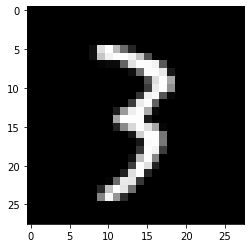

Y : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 3
A : 7


In [ ]:
index = 213
x = X_test[index]
x = np.reshape(x,(1,x.shape[0]))
x_hat = np.reshape(x,(28,28))
plt.imshow(x_hat , cmap='gray')
plt.show()
output = models.predict(x)
print("Y :", Y_test[index] ,np.argmax(Y_test[index]))
print("A :",np.argmax(output))
model.save("mnist_model.h5")

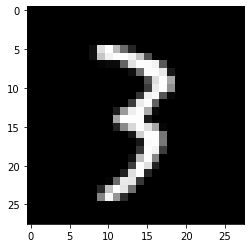

Y : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 3
A : 3


In [ ]:
from sklearn.metrics import confusion_matrix


model10 = get_model(784,10)
model10.load_weights("mnist_model.h5")

index = 213
x = X_test[index]
x = np.reshape(x,(1,x.shape[0]))
x_hat = np.reshape(x,(28,28))
plt.imshow(x_hat , cmap='gray')
plt.show()
output = model10.predict(x)
print("Y :", Y_test[index] ,np.argmax(Y_test[index]))
print("A :",np.argmax(output))


In [ ]:
from sklearn.metrics import confusion_matrix

model10 = get_model(784,10)
model10.load_weights("mnist_model.h5")
result = model.predict(X_test).round()
r_y = []
t_y = []

for i in range(len(X_test)):
  r_y.append(np.argmax(result[i]))
  t_y.append(np.argmax(result[i]))
print(confusion_matrix(t_y,r_y))
print('accuracy=%.2f%%'%(accuracy_score(t_y,r_y)*100))


OSError: ignored

In [ ]:
from numpy import array
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

x = array([[10,20,30],[20,30,40],[30,40,50],[40,50,60]])
y = array([40,50,60,70])

x_test = array([50,60,70])


model = Sequential()
model.add(Dense(100,activation='relu',input_dim = 3))
model.add(Dense(250,activation='relu'))
model.add(Dense(250,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(x,y,epochs=200,verbose=0)

x_test = np.reshape(x_test,(1,3))
pred = model.predict(x_test)
print(pred)

[[82.38273]]


In [ ]:
def split_sequence(sequence,n_step):
  x,y = list(), list()
  for i in range(len(sequence)):
    end_ix = i+n_step
    if (end_ix > len(sequence)-1):
      break
    seq_x,seq_y = sequence[i:end_ix] , sequence[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  return array(x),array(y)

seq = [10,20,30,40,50,60,70,80,90]
n_step = 3
x , y = split_sequence(seq,n_step)

In [ ]:
from numpy import array
from numpy import array
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

def load_data(path):
  data_temp = pd.read_csv(path)
  data = data_temp[['total']].to_numpy()
  return data

def split_sequence(sequence,n_step):
  x,y = list(), list()
  for i in range(len(sequence)):
    end_ix = i+n_step
    if (end_ix > len(sequence)-1):
      break
    seq_x,seq_y = sequence[i:end_ix] , sequence[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  return array(x),array(y)

def create_train_model(in_din,x,y):
  model = Sequential()
  model.add(Dense(1000,activation='relu',input_dim = in_din))
  model.add(Dense(2000,activation='relu'))
  model.add(Dense(3000,activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mse')
  model.fit(x,y,epochs=10,verbose=1)
  return model


seq = load_data("/content/drive/My Drive/training/data_day - data_day.csv")
seq1 = seq[0:len(seq)-1]
y_hat = seq[len(seq)-1]
x_test = seq[len(seq)-(n_step+1):len(seq)-1]
x_test = np.reshape(x_test,(1,n_step))
print(x_test.shape)
n_step = 50
x , y = split_sequence(seq1,n_step)
x = np.reshape(x,(x.shape[0],n_step))
model = create_train_model(n_step,x,y)
pred = model.predict(x_test)
print("answer %f"%y_hat)
print(pred)

(1, 50)
Epoch 1/10
46/46 [==============================] - 4s 80ms/step - loss: 1739219456.0000
Epoch 2/10
46/46 [==============================] - 4s 79ms/step - loss: 55838816.0000
Epoch 3/10
46/46 [==============================] - 4s 80ms/step - loss: 47713176.0000
Epoch 4/10
46/46 [==============================] - 4s 79ms/step - loss: 46183700.0000
Epoch 5/10
46/46 [==============================] - 4s 80ms/step - loss: 44742416.0000
Epoch 6/10
46/46 [==============================] - 4s 80ms/step - loss: 45329460.0000
Epoch 7/10
46/46 [==============================] - 4s 81ms/step - loss: 40946184.0000
Epoch 8/10
46/46 [==============================] - 4s 80ms/step - loss: 42794788.0000
Epoch 9/10
46/46 [==============================] - 4s 80ms/step - loss: 39691608.0000
Epoch 10/10
46/46 [==============================] - 4s 79ms/step - loss: 40985004.0000
answer 63471.190000
[[54793.92]]


# CNN

In [ ]:
from numpy import array
from numpy import array
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


def load_data(path):
  data_temp = pd.read_csv(path)
  data = data_temp[['total']].to_numpy()
  return data

def split_sequence(sequence,n_step):
  x,y = list(), list()
  for i in range(len(sequence)):
    end_ix = i+n_step
    if (end_ix > len(sequence)-1):
      break
    seq_x,seq_y = sequence[i:end_ix] , sequence[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  return array(x),array(y)

def create_train_model(in_din,x,y):
  model = Sequential()
  model.add(Dense(50,activation='relu',input_dim = in_din))
  model.add(Dense(150,activation='relu'))
  model.add(Dense(150,activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mse')
  model.fit(x,y,epochs=100,verbose=1)
  return model

def create_train_model_1DCNN(in_shape,x,y):
  model = Sequential()
  # CNN
  model.add(Conv1D(filters = 128 , kernel_size = 2, activation='relu' , input_shape=in_shape))
  model.add(MaxPooling1D(pool_size = 2))
  model.add(Flatten())
  # NN
  model.add(Dense(100,activation='relu'))
  model.add(Dense(150,activation='relu'))
  model.add(Dense(200,activation='relu'))

  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mse')
  model.fit(x,y,epochs=250,verbose=1)
  return model







# n_features = 1
# n_step =  3
# seq = [10,20,30,40,50,60,70,80,90]
# x_test = array([70,80,90])
# x_test = np.reshape(x_test,(1,3,n_features))
# x , y = split_sequence(seq,n_step)
# x = np.reshape(x,(x.shape[0],x.shape[1],n_features))
# model = create_train_model_1DCNN((n_step,n_features),x,y)
# print(model.summary())
# pred = model.predict(x_test)
# print(pred)







n_features = 1
n_step =  30
seq = load_data("/content/drive/My Drive/training/data_day - data_day.csv")
seq1 = seq[0:len(seq)-1]
y_hat = seq[len(seq)-1]
x_test = seq[len(seq)-(n_step+1):len(seq)-1]
x_test = np.reshape(x_test,(1,n_step,n_features))
x , y = split_sequence(seq1,n_step)
x = np.reshape(x,(x.shape[0],x.shape[1],n_features))
model = create_train_model_1DCNN((n_step,n_features),x,y)
print(model.summary())
pred = model.predict(x_test)
print(pred)



# seq = load_data("/content/drive/My Drive/training/data_day - data_day.csv")
# seq1 = seq[0:len(seq)-1]
# y_hat = seq[len(seq)-1]
# x_test = seq[len(seq)-(n_step+1):len(seq)-1]
# x_test = np.reshape(x_test,(1,n_step))
# print(x_test.shape)
# n_step = 50
# x , y = split_sequence(seq1,n_step)
# x = np.reshape(x,(x.shape[0],n_step))
# model = create_train_model(n_step,x,y)
# pred = model.predict(x_test)
# print("answer %f"%y_hat)
# print(pred)

Epoch 1/250
47/47 [==============================] - 0s 3ms/step - loss: 183115296.0000
Epoch 2/250
47/47 [==============================] - 0s 2ms/step - loss: 63353900.0000
Epoch 3/250
47/47 [==============================] - 0s 2ms/step - loss: 57535344.0000
Epoch 4/250
47/47 [==============================] - 0s 2ms/step - loss: 57667604.0000
Epoch 5/250
47/47 [==============================] - 0s 2ms/step - loss: 52746448.0000
Epoch 6/250
47/47 [==============================] - 0s 2ms/step - loss: 51845756.0000
Epoch 7/250
47/47 [==============================] - 0s 2ms/step - loss: 50662344.0000
Epoch 8/250
47/47 [==============================] - 0s 2ms/step - loss: 50025828.0000
Epoch 9/250
47/47 [==============================] - 0s 2ms/step - loss: 49911552.0000
Epoch 10/250
47/47 [==============================] - 0s 2ms/step - loss: 48549144.0000
Epoch 11/250
47/47 [==============================] - 0s 2ms/step - loss: 48415156.0000
Epoch 12/250
47/47 [====================

# LSTM


In [ ]:
from numpy import array
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten , LSTM
from keras.layers.convolutional import Conv1D 
from keras.layers.convolutional import MaxPooling1D


def load_data(path):
  data_temp = pd.read_csv(path)
  data = data_temp[['total']].to_numpy()
  return data

def split_sequence(sequence,n_step):
  x,y = list(), list()
  for i in range(len(sequence)):
    end_ix = i+n_step
    if (end_ix > len(sequence)-1):
      break
    seq_x,seq_y = sequence[i:end_ix] , sequence[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  return array(x),array(y)

def create_train_model(in_din,x,y):
  model = Sequential()
  model.add(Dense(50,activation='relu',input_dim = in_din))
  model.add(Dense(150,activation='relu'))
  model.add(Dense(150,activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mse')
  model.fit(x,y,epochs=100,verbose=1)
  return model

def create_train_model_1DCNN(in_shape,x,y):
  model = Sequential()
  # CNN
  model.add(Conv1D(filters = 128 , kernel_size = 2, activation='relu' , input_shape=in_shape))
  model.add(MaxPooling1D(pool_size = 2))
  model.add(Flatten())
  # NN
  model.add(Dense(100,activation='relu'))
  model.add(Dense(150,activation='relu'))
  model.add(Dense(200,activation='relu'))
  model.add(Dense(200,activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mse')
  model.fit(x,y,epochs=250,verbose=1)
  return model

def create_train_model_LSTM(in_shape,x,y):
  model = Sequential()

  #LSTM
  model.add(LSTM(50, input_shape = in_shape))

  # NN
  model.add(Dense(50,activation='relu'))
  model.add(Dense(100,activation='relu'))
  model.add(Dense(150,activation='relu'))
  model.add(Dense(200,activation='relu'))

  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mse')
  model.fit(x,y,epochs=200,verbose=1)
  return model




# n_features = 1
# n_step =  3
# seq = [10,20,30,40,50,60,70,80,90]
# x_test = array([70,80,90])
# x_test = np.reshape(x_test,(1,3,n_features))
# x , y = split_sequence(seq,n_step)
# x = np.reshape(x,(x.shape[0],x.shape[1],n_features))
# model = create_train_model_LSTM((n_step,n_features),x,y)
# print(model.summary())
# pred = model.predict(x_test)
# print(pred)







n_features = 1
n_step =  30
seq = load_data("/content/drive/My Drive/training/data_day - data_day.csv")
seq1 = seq[0:len(seq)-1]
y_hat = seq[len(seq)-1]
x_test = seq[len(seq)-(n_step+1):len(seq)-1]
x_test = np.reshape(x_test,(1,n_step,n_features))
x , y = split_sequence(seq1,n_step)
x = np.reshape(x,(x.shape[0],x.shape[1],n_features))
model = create_train_model_LSTM((n_step,n_features),x,y)
print(model.summary())
pred = model.predict(x_test)
print(pred)



# seq = load_data("/content/drive/My Drive/training/data_day - data_day.csv")
# seq1 = seq[0:len(seq)-1]
# y_hat = seq[len(seq)-1]
# x_test = seq[len(seq)-(n_step+1):len(seq)-1]
# x_test = np.reshape(x_test,(1,n_step))
# print(x_test.shape)
# n_step = 50
# x , y = split_sequence(seq1,n_step)
# x = np.reshape(x,(x.shape[0],n_step))
# model = create_train_model(n_step,x,y)
# pred = model.predict(x_test)
# print("answer %f"%y_hat)
# print(pred)

In [95]:
from numpy import array
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten , LSTM
from keras.layers.convolutional import Conv1D 
from keras.layers.convolutional import MaxPooling1D


def split_sequence(sequence,n_step):
  x,y = list(), list()
  for i in range(len(sequence)):
    end_ix = i+n_step
    if (end_ix > len(sequence)-1):
      break
    seq_x,seq_y = sequence[i:end_ix,0:2] , sequence[end_ix-1,-1]
    x.append(seq_x)
    y.append(seq_y)
  return array(x),array(y)


def create_train_model_2DCNN(in_shape,x,y):
  model = Sequential()
  # CNN
  model.add(Conv1D(filters = 128 , kernel_size = 2, activation='relu' , input_shape=in_shape))
  model.add(MaxPooling1D(pool_size = 2))
  model.add(Flatten())
  # NN
  model.add(Dense(100,activation='relu'))
  model.add(Dense(150,activation='relu'))
  model.add(Dense(200,activation='relu'))
  model.add(Dense(200,activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mse')
  model.fit(x,y,epochs=250,verbose=1)
  return model




n_step = 3
n_features = 2
seq1 =  array([10,20,30,40,50,60,70,80,90])
seq2 = array([15,25,35,45,55,65,75,85,95])
seq3 = array([seq1[i]+seq2[i] for i in range(len(seq1))]) # seq1 + seq2
print(seq3)
seq1_n = np.reshape(seq1,(len(seq1),1))
seq2_n = np.reshape(seq2,(len(seq2),1))
seq3_n = np.reshape(seq3,(len(seq3),1))



dataset = np.hstack([seq1_n , seq2_n,seq3_n])
x , y = split_sequence(dataset , n_step)
x = np.reshape(x,(x.shape[0],x.shape[1],n_features))
print(x)



# model = create_train_model_2DCNN((n_step,n_features),x,y)

# test = array([[80,85],[90,95],[100,105]])
# test = np.reshape(test,(1,n_step,n_features))
# pred = model.predict(test)
# print(pred)


[ 25  45  65  85 105 125 145 165 185]
[[[10 15]
  [20 25]
  [30 35]]

 [[20 25]
  [30 35]
  [40 45]]

 [[30 35]
  [40 45]
  [50 55]]

 [[40 45]
  [50 55]
  [60 65]]

 [[50 55]
  [60 65]
  [70 75]]

 [[60 65]
  [70 75]
  [80 85]]]


# CNN ทดสอบ


# ส่วนใหม่

In [111]:
from numpy import array
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten , LSTM
from keras.layers.convolutional import Conv1D 
from keras.layers.convolutional import MaxPooling1D
import calendar


def split_sequence(sequence,n_step):
  x,y = list(), list()
  for i in range(len(sequence)):
    end_ix = i+n_step
    if (end_ix > len(sequence)-1):
      break
    seq_x,seq_y = sequence[i:end_ix,0:2] , sequence[end_ix-1,-1]
    x.append(seq_x)
    y.append(seq_y)
  return array(x),array(y)



def create_train_model_2DCNN(in_shape,x,y):
  model = Sequential()
  # CNN
  model.add(Conv1D(filters = 128 , kernel_size = 2, activation='relu' , input_shape=in_shape))
  model.add(MaxPooling1D(pool_size = 2))
  model.add(Flatten())
  # NN
  model.add(Dense(100,activation='relu'))
  model.add(Dense(150,activation='relu'))
  model.add(Dense(200,activation='relu'))
  model.add(Dense(200,activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mse')
  model.fit(x,y,epochs=250,verbose=1)
  return model

def load_data(path):
  data_temp = pd.read_csv(path)
  data_temp.info()
  d = dict((v,k) for k,v in enumerate(calendar.month_abbr))
  data_temp['month'] = data_temp['month'].map(d)
  print(d)
  print(data_temp)
  data = data_temp.to_numpy()
  return data


n_step = 3
n_features = 2
seq1 =  array([10,20,30,40,50,60,70,80,90])
seq2 = array([15,25,35,45,55,65,75,85,95])
seq3 = array([seq1[i]+seq2[i] for i in range(len(seq1))]) # seq1 + seq2
print(seq3)
seq1_n = np.reshape(seq1,(len(seq1),1))
seq2_n = np.reshape(seq2,(len(seq2),1))
seq3_n = np.reshape(seq3,(len(seq3),1))



dataset = np.hstack([seq1_n , seq2_n,seq3_n])
print(dataset)
x , y = split_sequence(dataset , n_step)
x = np.reshape(x,(x.shape[0],x.shape[1],n_features))
# model = create_train_model_2DCNN((n_step,n_features),x,y)

# test = array([[80,85],[90,95],[100,105]])
# test = np.reshape(test,(1,n_step,n_features))
# pred = model.predict(test)
# print(pred)



# n_features = 1
# n_step =  30
# seq = load_data("/content/drive/My Drive/training/forest_fires_dataset.csv")

# print(seq)
# seq1 = seq[0:len(seq)-1]
# y_hat = seq[len(seq)-1]
# x_test = seq[len(seq)-(n_step+1):len(seq)-1]
# x_test = np.reshape(x_test,(1,n_step,n_features))
# x , y = split_sequence(seq1,n_step)
# x = np.reshape(x,(x.shape[0],x.shape[1],n_features))
# model = create_train_model_LSTM((n_step,n_features),x,y)
# print(model.summary())
# pred = model.predict(x_test)
# print(pred)


[ 25  45  65  85 105 125 145 165 185]
[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]
[[[10 15]
  [20 25]
  [30 35]]

 [[20 25]
  [30 35]
  [40 45]]

 [[30 35]
  [40 45]
  [50 55]]

 [[40 45]
  [50 55]
  [60 65]]

 [[50 55]
  [60 65]
  [70 75]]

 [[60 65]
  [70 75]
  [80 85]]]


In [ ]:
from numpy import array
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten , LSTM
from keras.layers.convolutional import Conv1D 
from keras.layers.convolutional import MaxPooling1D
import calendar

def split_sequence(sequence,n_step):
  x,y = list(), list()
  for i in range(len(sequence)):
    end_ix = i+n_step
    if (end_ix > len(sequence)-1):
      break
    seq_x,seq_y = sequence[i:end_ix,0:-1] , sequence[end_ix-1,-1]
    x.append(seq_x)
    y.append(seq_y)
  return array(x),array(y)


def con_month(dataset):
    m = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
    dataset['month'] = dataset.month.map(m)
    return dataset

def con_day(dataset):
    d = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
    dataset['day'] = dataset.day.map(d)
    return dataset

def load_data(path):
  data_temp = pd.read_csv(path)
  data_temp = con_month(data_temp) 
  data_temp = con_day(data_temp)
  data_temp.info()
  data = data_temp.to_numpy()
  return data

def create_train_model_2DCNN(in_shape,x,y):
  model = Sequential()
  # CNN
  model.add(Conv1D(filters = 256 , kernel_size = 4, activation='relu' , input_shape=in_shape))
  model.add(MaxPooling1D(pool_size = 2))
  model.add(Flatten())
  # NN
  model.add(Dense(100,activation='relu'))
  model.add(Dense(150,activation='relu'))
  model.add(Dense(200,activation='relu'))
  model.add(Dense(250,activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mean_absolute_percentage_error')
  model.fit(x,y,epochs=500,verbose=1)
  return model

n_step = 30
n_features = 12
seq = load_data("/content/drive/My Drive/training/forest_fires_dataset.csv")
seq1 = seq[0:len(seq)-1]
y_hat = seq[len(seq)-1]
x , y = split_sequence(seq1,n_step)
#  (506, 10, 12)
x = np.reshape(x,(x.shape[0],n_step,n_features))
model = create_train_model_2DCNN((n_step,n_features),x,y)
print(model.summary())
# print(x)
# print(y)

# row : col
# 506 : 516 , 0 : 12
#  517 - (10+1) : 517-1  , 0 : 12  
x_test = seq[seq.shape[0]-(n_step+1):len(seq)-1,0:n_features]
# row, seq = 10 , n_features = col
x_test = np.reshape(x_test,(1,n_step,n_features))
pred = model.predict(x_test)
print(pred)


In [207]:
from numpy import array
import pandas as pd
import numpy as np
from keras.models import Sequential , Model
from keras.layers import Dense
from keras.layers.merge import concatenate
from keras.layers import Flatten , LSTM , Input
from keras.layers.convolutional import Conv1D 
from keras.layers.convolutional import MaxPooling1D
import calendar

def split_sequence(sequence,n_step):
  x,y = list(), list()
  for i in range(len(sequence)):
    end_ix = i+n_step
    if (end_ix > len(sequence)-1):
      break
    seq_x,seq_y = sequence[i:end_ix,0:-1] , sequence[end_ix-1,-1]
    x.append(seq_x)
    y.append(seq_y)
  return array(x),array(y)


def con_month(dataset):
    m = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
    dataset['month'] = dataset.month.map(m)
    return dataset

def con_day(dataset):
    d = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
    dataset['day'] = dataset.day.map(d)
    return dataset

def load_data(path):
  data_temp = pd.read_csv(path)
  data_temp = con_month(data_temp) 
  data_temp = con_day(data_temp)
  data_temp.info()
  data = data_temp.to_numpy()
  return data

def create_train_model_2DCNN(in_shape,x,y):
  model = Sequential()
  # CNN
  model.add(Conv1D(filters = 256 , kernel_size = 4, activation='relu' , input_shape=in_shape))
  model.add(MaxPooling1D(pool_size = 2))
  model.add(Flatten())
  # NN
  model.add(Dense(100,activation='relu'))
  model.add(Dense(150,activation='relu'))
  model.add(Dense(200,activation='relu'))
  model.add(Dense(250,activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mse')
  model.fit(x,y,epochs=500,verbose=1)
  return model

def create_train_model_munti(in_shape,x1,x2,y):
  v1 = Input(shape=in_shape)
  cnn1 = Conv1D(filters=64, kernel_size=2, activation='relu')(v1)
  cnn1 = MaxPooling1D(pool_size=2)(cnn1)
  cnn1 = Flatten()(cnn1)
  v2 = Input(shape=in_shape)
  cnn2 = Conv1D(filters=64, kernel_size=2, activation='relu')(v2)
  cnn2 = MaxPooling1D(pool_size=2)(cnn2)
  cnn2 = Flatten()(cnn2)
  merge = concatenate([cnn1 , cnn2])
  dense - Dense(50,activation='relu') (merge)
  output = Dense(1)(dense)
  model = Model(input = [v1 , v2],output = output)
  model.compile(optimizer='adam' , loss='mse')
  model.fit([x,y],epochs=200,verbose=0)



# n_step = 30
# n_features = 12
# seq = load_data("/content/drive/My Drive/training/forest_fires_dataset.csv")
# seq1 = seq[0:len(seq)-1]
# y_hat = seq[len(seq)-1]
# x , y = split_sequence(seq1,n_step)
# #  (506, 10, 12)
# x = np.reshape(x,(x.shape[0],n_step,n_features))
# model = create_train_model_2DCNN((n_step,n_features),x,y)
# print(model.summary())
# # print(x)
# # print(y)

# # row : col
# # 506 : 516 , 0 : 12
# #  517 - (10+1) : 517-1  , 0 : 12  
# x_test = seq[seq.shape[0]-(n_step+1):len(seq)-1,0:n_features]
# # row, seq = 10 , n_features = col
# x_test = np.reshape(x_test,(1,n_step,n_features))
# pred = model.predict(x_test)
# print(pred)
